In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import BernoulliNB

In [2]:
!wget https://raw.githubusercontent.com/msivalenka/Mushroom-Dataset/master/mushrooms.csv

--2022-11-24 18:59:33--  https://raw.githubusercontent.com/msivalenka/Mushroom-Dataset/master/mushrooms.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 374003 (365K) [text/plain]
Saving to: ‘mushrooms.csv’

mushrooms.csv       100%[===================>] 365.24K  --.-KB/s    in 0.03s   

2022-11-24 18:59:34 (10.5 MB/s) - ‘mushrooms.csv’ saved [374003/374003]



#Problem

In [3]:
dataFrame = pd.read_csv('/content/mushrooms.csv')
dataFrame = dataFrame.iloc[:]
dataFrame

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


In [12]:
dataFrameEncoded = dataFrame.copy()
columns = dataFrame.columns.size

for i in range(1, columns):
    unique = dataFrame.iloc[:, i].unique()
    for j, u in enumerate(unique):
        dataFrameEncoded.iloc[:, i].replace(u, j, inplace=True)

dataFrameEncoded

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,e,0,0,1,0,1,0,0,1,0,...,0,0,0,0,0,0,0,1,1,1
2,e,1,0,2,0,2,0,0,1,1,...,0,0,0,0,0,0,0,1,1,2
3,p,0,1,2,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,e,0,0,3,1,3,0,1,1,0,...,0,0,0,0,0,0,1,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,4,0,0,1,3,1,0,1,10,...,0,6,7,0,2,0,0,8,5,6
8120,e,0,0,0,1,3,1,0,1,10,...,0,6,7,0,1,0,0,8,3,6
8121,e,3,0,0,1,3,1,0,1,1,...,0,6,7,0,2,0,0,8,5,6
8122,p,4,1,0,1,6,0,0,0,8,...,3,0,0,0,0,0,1,4,3,6


In [13]:
X = dataFrameEncoded.drop('class', axis=1).to_numpy()
y = dataFrameEncoded['class'].to_numpy()

print(np.unique(y))
print(X.shape)

['e' 'p']
(8124, 22)


In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.1)

In [15]:
nb = BernoulliNB()
nb.fit(X_train, y_train)

y_pred = nb.predict(X_test)
f'Accuaracy: {accuracy_score(y_test, y_pred)*100:.2f} %'

'Accuaracy: 90.04 %'

#2 Решающая функция


In [25]:
features_num = X.shape[1]
features = []

for f in range(features_num):
    features.append(np.unique(X[:, f]))

probs = [] # вероятности принадлжеать классу p
reg = 1
N = np.count_nonzero(y == 'p')

for f, uniq_features in enumerate(features):
    counts = np.zeros(uniq_features.shape[0])

    for j, f_v in enumerate(uniq_features):
        n_c_f = np.count_nonzero(X[:, f] == f_v)
        prob = n_c_f / N
        counts[j] = prob

    probs.append(counts)

accuracy_of_feature = np.zeros(features_num)

y_gt = y == 'p'

for f in range(features_num):
    y_pred = np.zeros(X.shape[0])
    for i, x in enumerate(X):
        prob = probs[f][x[f]]
        
        y_pred[i] = prob > 0.9
    
    accuracy_of_feature[f] = accuracy_score(y_gt, y_pred)

best_feature_ind = np.argmax(accuracy_of_feature)

print('Распределение очность предсказания решающей функции по фичам:', *accuracy_of_feature)
print('Наиболее информативная фича: ', dataFrame.columns[best_feature_ind + 1])
print(f'Точность предсказания на всей выборки по этой фиче {max(accuracy_of_feature) * 100:.2f}%')

Распределение очность предсказания решающей функции по фичам: 0.48842934515017233 0.517971442639094 0.517971442639094 0.7439684884293452 0.11324470704086657 0.5034465780403742 0.6159527326440177 0.24372230428360414 0.517971442639094 0.44707040866568193 0.5100935499753816 0.258985721319547 0.28852781880846873 0.38995568685376664 0.39192516001969474 0.48202855736090594 0.5046774987690793 0.533727227966519 0.23042836041358936 0.517971442639094 0.7218119153126539 0.517971442639094
Наиболее информативная фича:  bruises
Точность предсказания на всей выборки по этой фиче 74.40%


# Посмотреть название самой информативной фичи

#Naive Bias Implementation

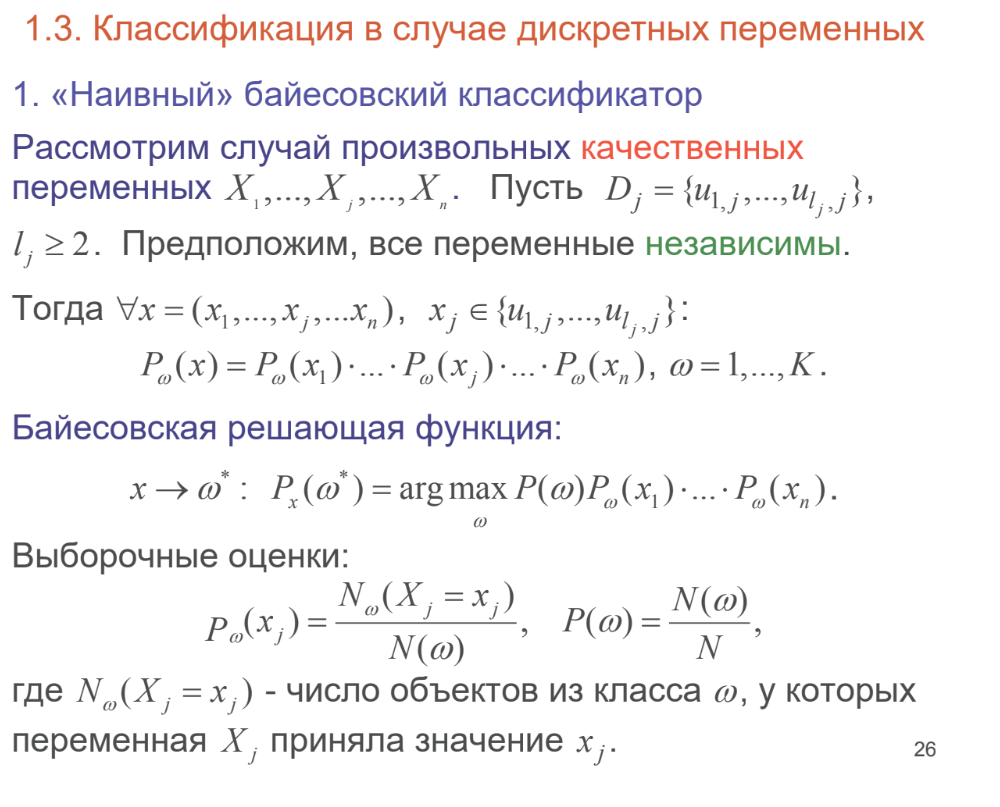

In [ ]:
class MyNaiveBayesMultiClass():
    def __init__(self, reg):
        self.reg = reg
        pass

    def count_probs(self, X: np.ndarray):
        max_feature_val = 0

        for uniq_features in self.features:
            new_max = uniq_features.max()
            max_feature_val = max(max_feature_val, new_max)
            assert uniq_features.min() >= 0

        probs = np.zeros((self.classes.shape[0], self.features_num, max_feature_val + 1))

        for c in range(self.classes.shape[0]):
            mask = self.class_masks[c]
            X_c = X[mask, :] # Subset of objects of class 'c'
        
            for f, uniq_features in enumerate(self.features):
         
                for j, f_v in enumerate(uniq_features):
                    n_c_f = np.count_nonzero(X_c[:, f] == f_v)
                    prob = (n_c_f + self.reg) / (self.N[c] + uniq_features.size * self.reg)
       
                    probs[c, f, j] = prob
        return probs

    def fit(self, X, y):
        self.classes = np.unique(y)
        cls_num = self.classes.shape[0]
        self.P = np.zeros(self.classes.shape[0])
        self.N = np.zeros(self.classes.shape[0])
        self.class_masks = []
        self.features_num = X.shape[1]

        for i, c in enumerate(self.classes):
            mask = y == c
            self.class_masks.append(mask)
            count_of_class = np.count_nonzero(mask)
            self.P[i] = count_of_class / y.shape[0]
            self.N[i] = count_of_class

         
        self.features = [] # (features_num, unique_features)
        self.features_map = []
        features_num = X.shape[1]
        for f in range(features_num):
            unique_values = np.unique(X[:, f])
            self.features.append(unique_values)
            self.features_map.append({u: i for i, u in enumerate(unique_values)})

        self.p = self.count_probs(X) # (classes, features, size of feature)


    def get_class_probs(self, _X):
        X = np.copy(_X)
        if len(X.shape) < 2:
            X = X[np.newaxis, :]
        
        obj_num = X.shape[0]
        probs = np.zeros((self.classes.shape[0], obj_num))
 
        for j, x in enumerate(X):
            for c in range(self.classes.shape[0]):
                res_prob = self.P[c]
                for f in range(len(self.features)):
                    res_prob *= self.p[c, f, x[f]]

                probs[c, j] = res_prob
        return probs

    def predict_proba(self, X):
        probs = self.get_class_probs(X)
        logs = np.log(probs[0]) / np.log(probs[1])
        true_probs = 1 / (1 + np.exp(-logs))

        return true_probs

    def predict(self, X):
        probs = self.get_class_probs(X)
        return [self.classes[i] for i in probs.argmax(axis=0)]


mybias = MyNaiveBayesMultiClass(1)
mybias.fit(X_train, y_train)
print("Original acccuracy: ", accuracy_score(y_test, mybias.predict(X_test)))

probs = mybias.predict_proba(X_test)
y_pred = np.where(probs > 0.7, 'p', 'e')

print("Probs acccuracy: ", accuracy_score(y_test, y_pred))

Original acccuracy:  0.956949569495695
Probs acccuracy:  0.971709717097171


In [ ]:
res = []
regs = [*range(-200, 200, 2)]
for i in regs:
    mybias = MyNaiveBayesMultiClass(i)

    mybias.fit(X_train, y_train)

    y_pred = mybias.predict(X_test)
    res.append(accuracy_score(y_test, y_pred) * 100)


In [ ]:
best_bayes_reg = regs[np.argmax(res)]
print('Best reg parameter: ', best_bayes_reg)

Best reg parameter:  0


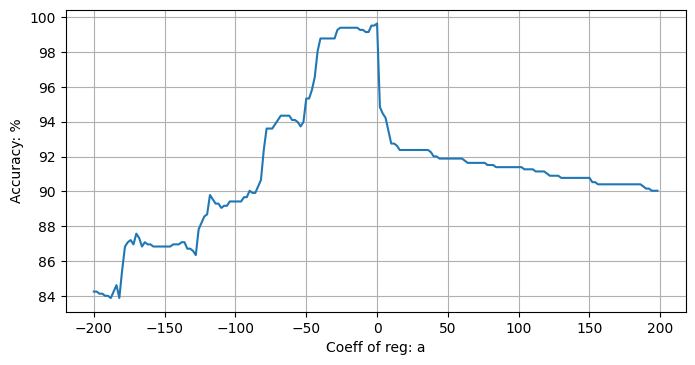

In [ ]:
plt.figure(figsize=(8, 4), dpi=100)
plt.grid()
plt.ylabel('Accuracy: %')
plt.xlabel('Coeff of reg: a')
plt.plot(regs, res);

# Пукнт 5
Применить метод логистической регрессии, использовав в качестве переменных оценки вероятностей, подвергнутые обратному логистическому преобразованию.


In [ ]:
from sklearn.linear_model import LogisticRegression

class BayesPlusLogReg:
    def __init__(self, alpha):
        self.bayes = MyNaiveBayesMultiClass(alpha)
        self.logreg = LogisticRegression()

    def fit(self, X, y):
        self.bayes.fit(X, y)
        bayes_probs = self.bayes.predict_proba(X).reshape(-1, 1)
        self.logreg.fit(bayes_probs, y)

    def predict(self, X):
        bayes_probs= self.bayes.predict_proba(X).reshape(-1, 1)
        
        return self.logreg.predict(bayes_probs)


In [ ]:
my_cls = BayesPlusLogReg(best_bayes_reg)
my_cls.fit(X_train, y_train)

y_train_pred = my_cls.predict(X_train)
y_test_pred = my_cls.predict(X_test)

print('Accuracy on train dataset: ', accuracy_score(y_train, y_train_pred))

print('Accuracy on test dataset: ', accuracy_score(y_test, y_test_pred))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:75: RuntimeWarning: divide by zero encountered in log


Accuracy on train dataset:  0.9976747366981261
Accuracy on test dataset:  0.997539975399754


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:75: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:75: RuntimeWarning: divide by zero encountered in log
